In [140]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.weight'] = 'normal'
plt.rcParams['font.size'] = 22
%matplotlib inline

In [191]:
def rolling_apply(fun, a, w):
    r = np.empty(a.shape)
    r.fill(0)
    for i in range(0, a.shape[0]):
        r[i] = fun(a[(i-w+1):i+1])
    return r

In [192]:
rewards_resnet = np.load('runs/resnet/results.npy')
rewards_res = np.load('runs/resnetF/results.npy')
rewards_mlp = np.load('runs/mlp/results.npy')

reward_list = [rewards_resnet]
labels = ['Resnet_1e-7']
#reward_list = [rewards_resnet, rewards_cnn, rewards_mlp]
#labels = ['Resnet', 'CNN-mlp', 'MLP']



In [193]:
np.mean(rewards_resnet[6000-100:6000]), np.std(rewards_resnet[6000-100:6000])

(138.88065187950713, 26.462905052925173)

In [194]:
#np.mean(rewards_res[20000-100:20000]), np.std(rewards_res[20000-100:20000])

In [153]:
#np.mean(rewards_mlp[500-100:500]), np.std(rewards_mlp[500-100:500])

(nan, nan)

In [68]:
myopic = np.load('runs/myopic/rewards_test.npy')
#myopic

In [195]:

means = [rolling_apply(np.mean, r, 100) for r in reward_list]
t = np.arange(means[0].shape[0])

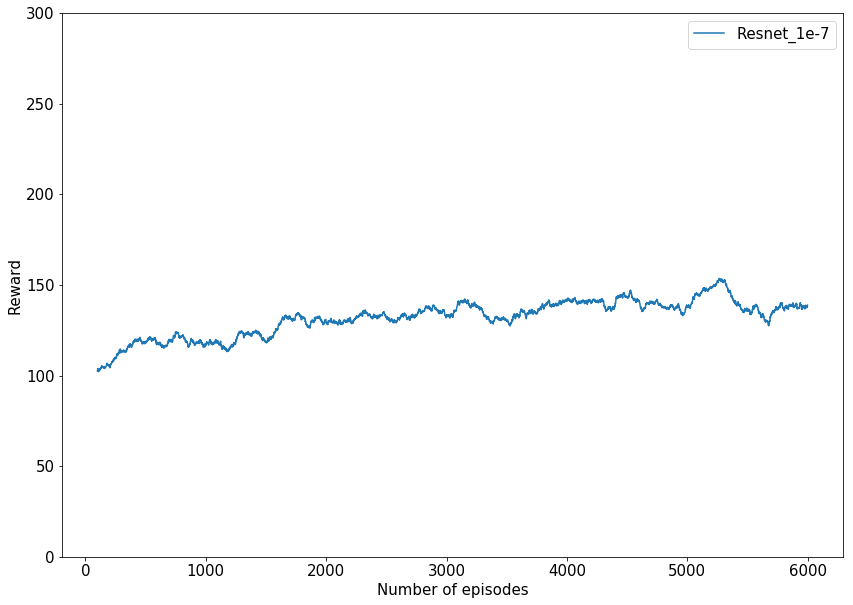

In [196]:
plt.figure(figsize=(14, 10))
ax = plt.subplot(111)
ax.set_xlabel('Number of episodes')
ax.set_ylabel('Reward')
for i in range(len(means)):
    ax.plot(np.arange(means[i].shape[0])[:6000], means[i][:6000], label=labels[i])
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)
plt.ylim(0, 300)
plt.legend(fontsize=15)
plt.savefig('paper/figs/learningcurve.pdf')

In [103]:
np.min(meanz)

NameError: name 'meanz' is not defined